In [1]:
import numpy as np
import pandas as pd

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
dates = pd.date_range('20130101', periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [7]:
df

,A,B,C,D
2013-01-01,1.083009,1.437408,0.439852,1.011174
2013-01-02,-0.462478,-1.871602,-0.718320,-0.370919
2013-01-03,1.526500,-0.816482,1.378158,0.818494
2013-01-04,0.833699,-0.572579,0.059246,0.790633
2013-01-05,-0.956452,0.435211,-0.206246,-2.286490
2013-01-06,1.243038,-0.158249,-1.536827,1.170956


In [8]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

In [12]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

<AxesSubplot:>

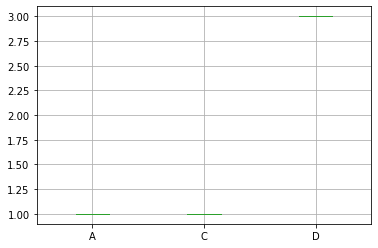

In [23]:
df2.boxplot()

In [21]:
df2.head()

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [29]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [32]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [33]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [35]:
df.to_numpy()

array([[ 1.08300909,  1.43740797,  0.43985203,  1.01117381],
       [-0.46247788, -1.87160209, -0.71831993, -0.37091916],
       [ 1.52649976, -0.81648182,  1.37815789,  0.81849427],
       [ 0.83369922, -0.57257927,  0.05924625,  0.79063327],
       [-0.95645154,  0.43521115, -0.20624572, -2.28649016],
       [ 1.24303758, -0.15824918, -1.53682709,  1.17095551]])

In [39]:
df2.to_numpy() # more expensive b/c multiple dtypes

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [45]:
df.T # transposing

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.083009,-0.462478,1.526500,0.833699,-0.956452,1.243038
B,1.437408,-1.871602,-0.816482,-0.572579,0.435211,-0.158249
C,0.439852,-0.718320,1.378158,0.059246,-0.206246,-1.536827
D,1.011174,-0.370919,0.818494,0.790633,-2.286490,1.170956


In [46]:
df.transpose()

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.083009,-0.462478,1.526500,0.833699,-0.956452,1.243038
B,1.437408,-1.871602,-0.816482,-0.572579,0.435211,-0.158249
C,0.439852,-0.718320,1.378158,0.059246,-0.206246,-1.536827
D,1.011174,-0.370919,0.818494,0.790633,-2.286490,1.170956


In [49]:
df.sort_index(axis=1, ascending=False) # axis?

,D,C,B,A
2013-01-01,1.011174,0.439852,1.437408,1.083009
2013-01-02,-0.370919,-0.718320,-1.871602,-0.462478
2013-01-03,0.818494,1.378158,-0.816482,1.526500
2013-01-04,0.790633,0.059246,-0.572579,0.833699
2013-01-05,-2.286490,-0.206246,0.435211,-0.956452
2013-01-06,1.170956,-1.536827,-0.158249,1.243038


In [51]:
df.sort_values(by='B', ascending=False)

,A,B,C,D
2013-01-01,1.083009,1.437408,0.439852,1.011174
2013-01-05,-0.956452,0.435211,-0.206246,-2.286490
2013-01-06,1.243038,-0.158249,-1.536827,1.170956
2013-01-04,0.833699,-0.572579,0.059246,0.790633
2013-01-03,1.526500,-0.816482,1.378158,0.818494
2013-01-02,-0.462478,-1.871602,-0.718320,-0.370919


In [52]:
df['A']

2013-01-01    1.083009
2013-01-02   -0.462478
2013-01-03    1.526500
2013-01-04    0.833699
2013-01-05   -0.956452
2013-01-06    1.243038
Freq: D, Name: A, dtype: float64

In [55]:
df[['A', 'D']]

,A,D
2013-01-01,1.083009,1.011174
2013-01-02,-0.462478,-0.370919
2013-01-03,1.526500,0.818494
2013-01-04,0.833699,0.790633
2013-01-05,-0.956452,-2.286490
2013-01-06,1.243038,1.170956


In [56]:
df[0:3]

,A,B,C,D
2013-01-01,1.083009,1.437408,0.439852,1.011174
2013-01-02,-0.462478,-1.871602,-0.718320,-0.370919
2013-01-03,1.526500,-0.816482,1.378158,0.818494


In [57]:
t = df.T

In [58]:
t['A':'C']

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.083009,-0.462478,1.526500,0.833699,-0.956452,1.243038
B,1.437408,-1.871602,-0.816482,-0.572579,0.435211,-0.158249
C,0.439852,-0.718320,1.378158,0.059246,-0.206246,-1.536827


In [62]:
df.loc[dates[2]] # dates is our datetimeindex originally used to make df

A    1.526500
B   -0.816482
C    1.378158
D    0.818494
Name: 2013-01-03 00:00:00, dtype: float64

In [63]:
df.loc[:, ['A', 'B']] # better than [['A', 'B']]

,A,B
2013-01-01,1.083009,1.437408
2013-01-02,-0.462478,-1.871602
2013-01-03,1.526500,-0.816482
2013-01-04,0.833699,-0.572579
2013-01-05,-0.956452,0.435211
2013-01-06,1.243038,-0.158249


In [65]:
df.loc[dates[2]:dates[2], ['A', 'D']] # by row and column

,A,D
2013-01-01,1.083009,1.011174
2013-01-02,-0.462478,-0.370919
2013-01-03,1.526500,0.818494


In [70]:
df.loc[dates[1], ['A','B']]

A   -0.462478
B   -1.871602
Name: 2013-01-02 00:00:00, dtype: float64

In [66]:
df.loc[dates[2], 'C'] # scalar value

1.3781578910317214

In [69]:
df.at[dates[2], 'C'] # faster than above

1.3781578910317214

In [71]:
df.iloc[3]

A    0.833699
B   -0.572579
C    0.059246
D    0.790633
Name: 2013-01-04 00:00:00, dtype: float64

In [73]:
df.iloc[3:5, 0:2] # exclusive range

,A,B
2013-01-04,0.833699,-0.572579
2013-01-05,-0.956452,0.435211


In [75]:
df.iloc[[3, 4, 5], [0, 2]] # by r/c location

,A,C
2013-01-04,0.833699,0.059246
2013-01-05,-0.956452,-0.206246
2013-01-06,1.243038,-1.536827


In [76]:
df.iloc[:, 1:3] # slice only c (or r)

,B,C
2013-01-01,1.437408,0.439852
2013-01-02,-1.871602,-0.718320
2013-01-03,-0.816482,1.378158
2013-01-04,-0.572579,0.059246
2013-01-05,0.435211,-0.206246
2013-01-06,-0.158249,-1.536827


In [83]:
df[df['A'] > 0]

,A,B,C,D
2013-01-01,1.083009,1.437408,0.439852,1.011174
2013-01-03,1.526500,-0.816482,1.378158,0.818494
2013-01-04,0.833699,-0.572579,0.059246,0.790633
2013-01-06,1.243038,-0.158249,-1.536827,1.170956


In [92]:
df.loc[df.loc[:, 'A'] > 0]

,A,B,C,D
2013-01-01,1.083009,1.437408,0.439852,1.011174
2013-01-03,1.526500,-0.816482,1.378158,0.818494
2013-01-04,0.833699,-0.572579,0.059246,0.790633
2013-01-06,1.243038,-0.158249,-1.536827,1.170956


In [93]:
df[df > 0] # shorthand for "value of df"

,A,B,C,D
2013-01-01,1.083009,1.437408,0.439852,1.011174
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,1.526500,NaN,1.378158,0.818494
2013-01-04,0.833699,NaN,0.059246,0.790633
2013-01-05,NaN,0.435211,NaN,NaN
2013-01-06,1.243038,NaN,NaN,1.170956


In [94]:
df3 = df.copy()
df3['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df3

,A,B,C,D,E
2013-01-01,1.083009,1.437408,0.439852,1.011174,one
2013-01-02,-0.462478,-1.871602,-0.718320,-0.370919,one
2013-01-03,1.526500,-0.816482,1.378158,0.818494,two
2013-01-04,0.833699,-0.572579,0.059246,0.790633,three
2013-01-05,-0.956452,0.435211,-0.206246,-2.286490,four
2013-01-06,1.243038,-0.158249,-1.536827,1.170956,three


In [96]:
df3[df3['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,1.526500,-0.816482,1.378158,0.818494,two
2013-01-05,-0.956452,0.435211,-0.206246,-2.286490,four


In [98]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [100]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,1.083009,1.437408,0.439852,1.011174,NaN
2013-01-02,-0.462478,-1.871602,-0.718320,-0.370919,1.0
2013-01-03,1.526500,-0.816482,1.378158,0.818494,2.0
2013-01-04,0.833699,-0.572579,0.059246,0.790633,3.0
2013-01-05,-0.956452,0.435211,-0.206246,-2.286490,4.0
2013-01-06,1.243038,-0.158249,-1.536827,1.170956,5.0


In [103]:
df.at[dates[0], 'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,1.437408,0.439852,1.011174,NaN
2013-01-02,-0.462478,-1.871602,-0.718320,-0.370919,1.0
2013-01-03,1.526500,-0.816482,1.378158,0.818494,2.0
2013-01-04,0.833699,-0.572579,0.059246,0.790633,3.0
2013-01-05,-0.956452,0.435211,-0.206246,-2.286490,4.0
2013-01-06,1.243038,-0.158249,-1.536827,1.170956,5.0
